In [1]:
from importlib import reload
import sys, os

In [2]:
%matplotlib inline

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [6]:
from ftnmr import *

In [11]:
sg = fid(T2=2000, shift=5.0, shift_maximum=20.0)

In [12]:
sg.f_s*1000

1277.3243555349768

In [49]:
sg.shift

5.0

In [50]:
sg.t[-1]

12825.246719059696

In [51]:
sg.f_s

0.6386621777674883

In [54]:
sg.ns

8192

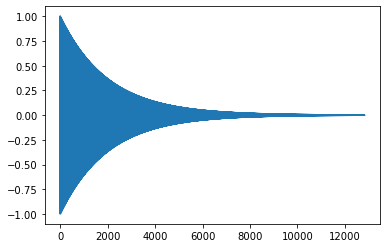

In [53]:
plt.plot(sg.t, sg.signal.real)

In [41]:
f = np.arange(0, sg.ns)*sg.f_s/sg.ns

In [39]:
S = scipy.fft.fft(sg.signal)

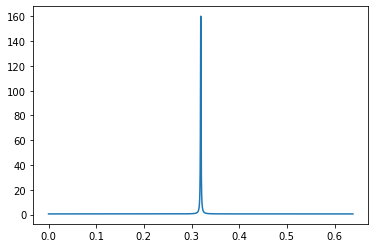

In [42]:
plt.plot(f, S.real)

In [158]:
ds = S.real - Sg().real

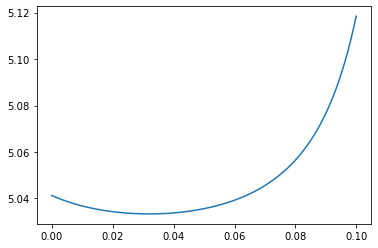

In [159]:
plt.plot(f, ds)